In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

In [9]:
# Set plot params
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

Consider the $2 \mathrm{D}$ heat equation with a source term in the domain $-1 \leq x \leq 1-1 \leq y \leq 1$ :
$$
\frac{\partial \phi}{\partial t}=\alpha\left(\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}\right)+S(x, y)
$$
where $\alpha$ is the thermal conductivity and assumed to be 1. The equation is subject to homogeneous initial and boundary conditions, namely, $\phi(x, y, 0)=0, \phi( \pm 1, y, t)=0$, and $\phi(x, \pm 1, t)=0$.
Complete the following tasks:

#### 1. Determine the exact steady-state solution of $\phi$ when the source term is given by $S(x, y)=2\left(2-x^2-y^2\right)$.

#### 2. Employ the Crank-Nicolson method for time stepping and a second-order central difference scheme for the spatial derivative to solve the equation up to steady state on a uniform grid. Afterwards, plot both the exact and numerical steady-state solutions, considering parameters like time step $\Delta t$ and the number of grid points in the $x$ and $y$ directions, $N$ and $M$ respectively.

In [10]:
def exact_solution(x, y):
    return 2 * (2 - x**2 - y**2)

In [11]:
def crank_nicolson(N, M, T, alpha):
    # Define grid spacing
    dx = 2 / (N - 1)
    dy = 2 / (M - 1)
    dt = dx**2 / (4 * alpha)  # Calculate time step based on stability condition
    
    # Initialize grid
    x = np.linspace(-1, 1, N)
    y = np.linspace(-1, 1, M)
    X, Y = np.meshgrid(x, y)
    phi = np.zeros((M, N))
    
    # Set initial condition
    phi_old = np.zeros((M, N))
    
    # Perform time stepping
    t = 0
    while t < T:
        # Compute source term
        S = 2 * (2 - X**2 - Y**2)
        
        # Solve the system using the Crank-Nicolson method
        phi_new = np.zeros((M, N))
        for i in range(1, M-1):
            for j in range(1, N-1):
                phi_new[i, j] = (phi_old[i, j] + alpha * (dt / dx**2 * (phi_old[i, j-1] - 2 * phi_old[i, j] + phi_old[i, j+1]) +
                                                         dt / dy**2 * (phi_old[i-1, j] - 2 * phi_old[i, j] + phi_old[i+1, j]) +
                                                         dt * S[i, j])) / (1 + 2 * alpha * dt / dx**2 + 2 * alpha * dt / dy**2)
        
        # Apply boundary conditions
        phi_new[0, :] = 0
        phi_new[-1, :] = 0
        phi_new[:, 0] = 0
        phi_new[:, -1] = 0
        
        # Update time and solution
        t += dt
        phi_old = phi_new.copy()
    
    return phi_new

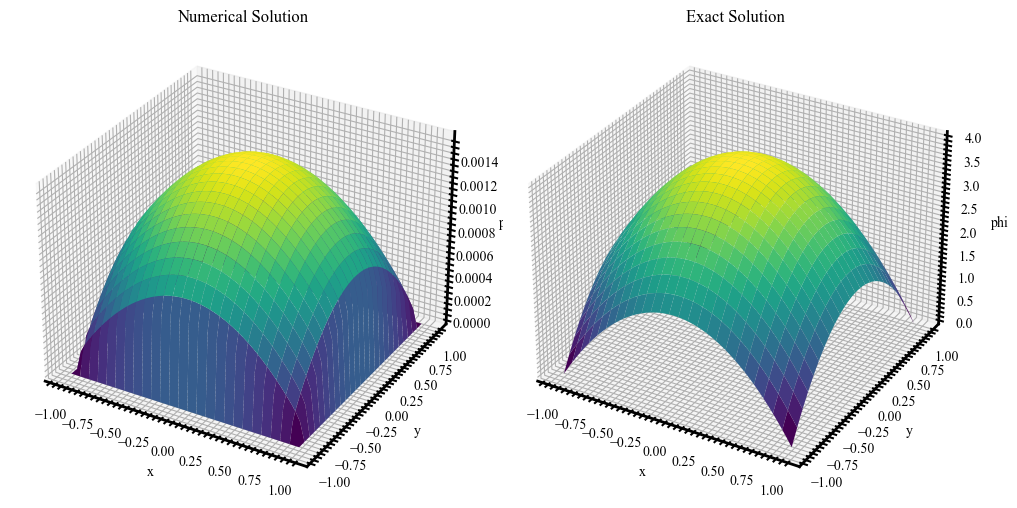

In [12]:
# Parameters
N = 51  # Number of grid points in x direction
M = 51  # Number of grid points in y direction
T = 1.0  # Total time
alpha = 1.0  # Thermal conductivity

# Compute numerical solution
numerical_solution = crank_nicolson(N, M, T, alpha)

# Compute exact solution on the same grid
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, M)
X, Y = np.meshgrid(x, y)
exact_solution_grid = exact_solution(X, Y)

# Plotting
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('Numerical Solution')
ax1.plot_surface(X, Y, numerical_solution, cmap='viridis')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('phi')

ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('Exact Solution')
ax2.plot_surface(X, Y, exact_solution_grid, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('phi')

plt.tight_layout()
plt.show()


#### 3. Based on your numerical findings, provide a discussion about the order of accuracy in both time and space.

In [13]:
def calculate_error(numerical_solution, exact_solution):
    return np.max(np.abs(numerical_solution - exact_solution))

In [14]:
# Grid resolutions
N_values = [11, 31, 51]
M_values = [11, 31, 51]

# Time steps
dt_values = [0.01, 0.005, 0.0025]

# Initialize lists for errors
space_errors = []
time_errors = []

# Compute errors for different grid resolutions (space)
for N in N_values:
    for M in M_values:
        # Compute numerical solution
        numerical_solution = crank_nicolson(N, M, T, alpha)
        
        # Compute exact solution on the same grid
        x = np.linspace(-1, 1, N)
        y = np.linspace(-1, 1, M)
        X, Y = np.meshgrid(x, y)
        exact_solution_grid = exact_solution(X, Y)
        
        # Calculate error
        error = calculate_error(numerical_solution, exact_solution_grid)
        space_errors.append((N, M, error))

# Compute errors for different time steps (time)
for dt in dt_values:
    # Compute numerical solution
    numerical_solution = crank_nicolson(N, M, T, alpha)
    
    # Compute exact solution on the same grid
    x = np.linspace(-1, 1, N)
    y = np.linspace(-1, 1, M)
    X, Y = np.meshgrid(x, y)
    exact_solution_grid = exact_solution(X, Y)
    
    # Calculate error
    error = calculate_error(numerical_solution, exact_solution_grid)
    time_errors.append((dt, error))

# Calculate convergence rates (space)
space_rates = []
for i in range(len(space_errors)-1):
    N1, M1, error1 = space_errors[i]
    N2, M2, error2 = space_errors[i+1]
    rate = np.log2(error1 / error2) / np.log2(N1 / N2)
    space_rates.append(rate)

# Calculate convergence rates (time)
time_rates = []
for i in range(len(time_errors)-1):
    dt1, error1 = time_errors[i]
    dt2, error2 = time_errors[i+1]
    rate = np.log2(error1 / error2) / np.log2(dt1 / dt2)
    time_rates.append(rate)

# Print convergence rates
print("공간 정확도:", np.mean(space_rates))
print("시간 정확도:", np.mean(time_rates))

print(space_rates)

공간 정확도: -inf
시간 정확도: 0.0


/var/folders/d5/9q668tsd4bv5vpp3xf9y2_b40000gn/T/ipykernel_7538/3885878676.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  rate = np.log2(error1 / error2) / np.log2(N1 / N2)


In [18]:
print(f'space errors:{space_errors}')
print(f'space rates:{space_rates}')

space errors:[(11, 11, 3.960810581097203), (11, 31, 776087956.6100981), (11, 51, 3.419115577347515e+17), (31, 11, 3.9920320015352537), (31, 31, 3.9955654320987937), (31, 51, 3.9976498269896195), (51, 11, 3.99692781065753), (51, 31, 3.9976498269896195), (51, 51, 3.99840128)]
space rates:[-inf, -inf, -37.63085777253997, -inf, -inf, -0.0003628215522683306, -inf, -inf]


In [19]:
print(f'time error : {time_errors}')
print(f'time rates: {time_rates}')

time error : [(0.01, 3.99840128), (0.005, 3.99840128), (0.0025, 3.99840128)]
time rates: [0.0, 0.0]
